# Assumptions of Linear Regression

Data Source should be evaluted in accordane with multicolinearity, equal variance, autocorrelation and so on. Linear Regression is only half to build up something. The important point is how our data comply with our regression model.

# Assumption 1

In [3]:
if(!require(readxl)) {
  install.packages("readxl"); require(readxl)
}
if(!require(lmtest)){
  install.packages("lmtest"); require(lmtest)
}
if(!require(corrplot)) {
  install.packages("corrplot"); require(corrplot)
}
if(!require(car)) {
  install.packages("car"); require(car)
}
if(!require(gvlma)) {
  install.packages("gvlma"); require(gvlma)  
}


Loading required package: readxl
Loading required package: lmtest
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: corrplot
Loading required package: car
Loading required package: gvlma


In [4]:
#The following line provides you a GUI screen which helps to select your file.
#my_data <- read_excel(file.choose())
currentDirectory <- getwd()
setwd("C:\\Users\\zoint\\Desktop\\AllFiles\\Projeler\\R_Projects")
directoryChanged <- getwd()
my_data <- read_excel("Autoform_1000.xlsx")

In [5]:
meanResidual <- function(){
  mod <- lm(HARDNESSP1 ~ TransportTimeAfterHeating, data = my_data)
  mean (mod$residuals)
}
meanResidual()

[1] -6.602542e-16

# Assumption 2

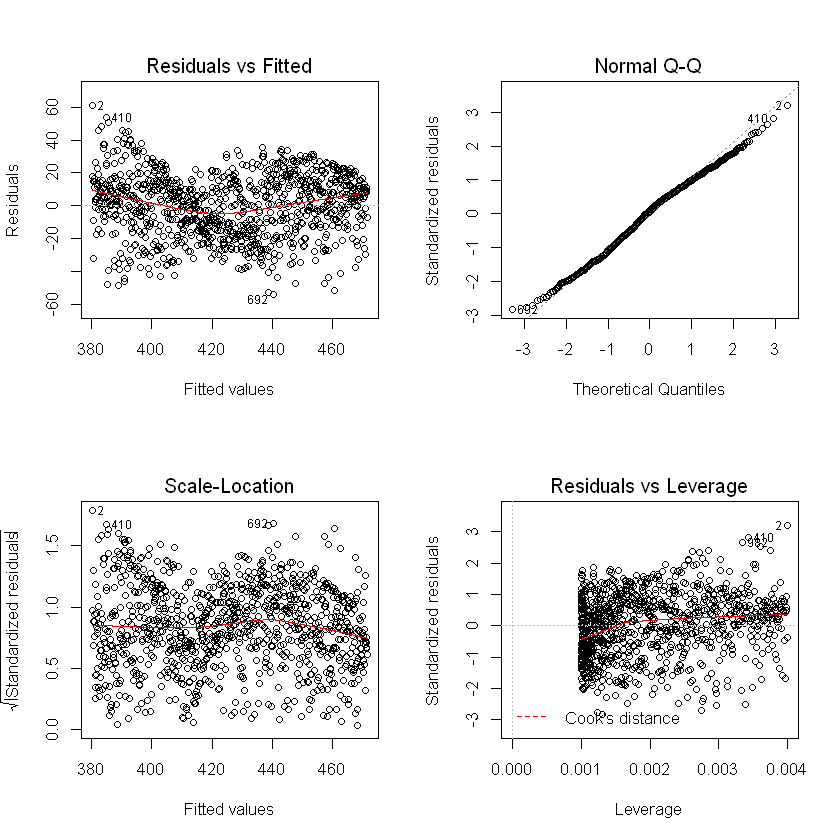

In [6]:
homosCedasticity <- function(){
  par(mfrow = c(2,2)) # set 2 rows and 2 column  plot layout
  mod_layout <- lm(HARDNESSP1 ~ TransportTimeAfterHeating, data = my_data)
  plot(mod_layout)
}
homosCedasticity()


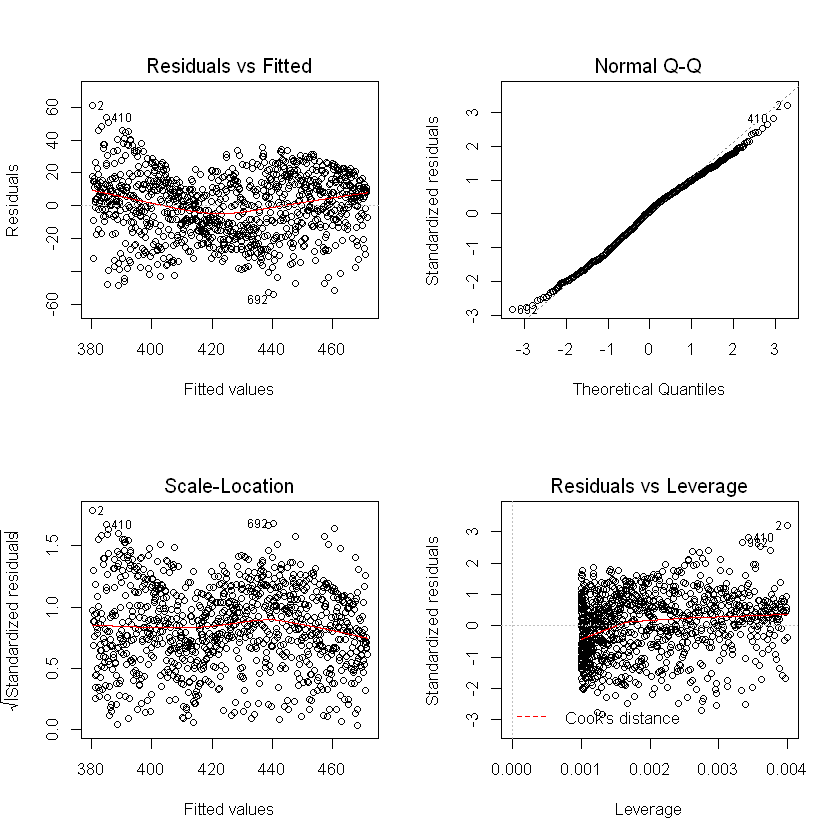

# Autocorrelation (Assumption 3)


	Durbin-Watson test

data:  lmMod
DW = 2.0076, p-value = 0.5485
alternative hypothesis: true autocorrelation is greater than 0



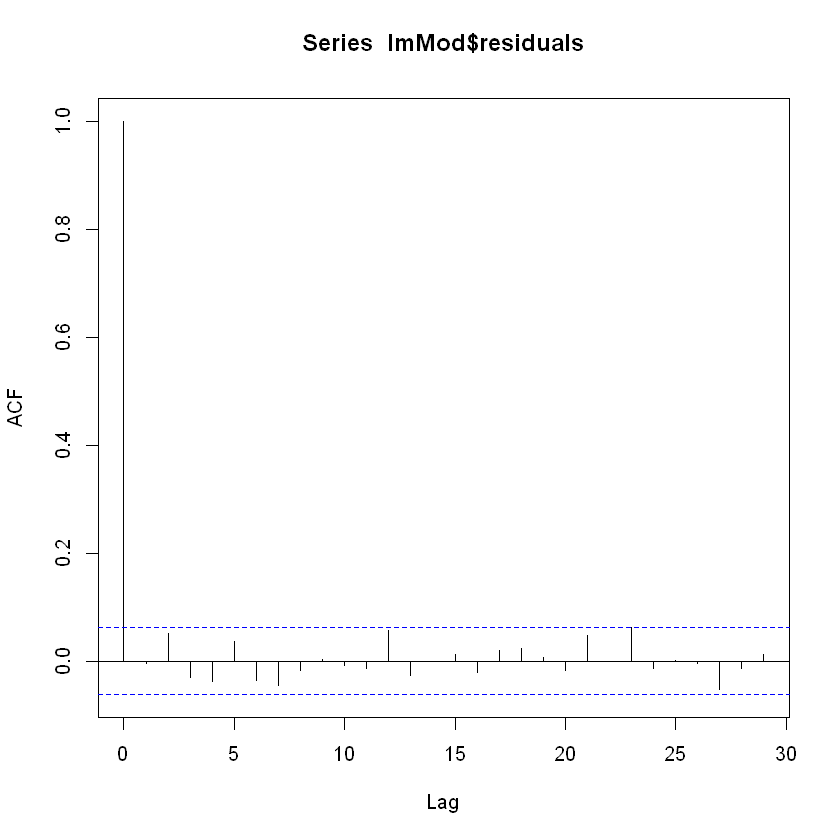

In [7]:
autocorrelation <- function()
{
  lmMod <- lm(thickness ~ spacing, data = my_data)
  acf(lmMod$residuals)
  #Durbin - Watson Test
  #If the result is higher than 0, then our data is autocorrelated.
  print(lmtest::dwtest(lmMod))
}
autocorrelation()

# Assumption 4

In [8]:
variabilityInX <- function(){
  if(var(my_data$thickness) > 0.0 && var(my_data$TransportTimeAfterHeating) > 0.0
     && var(my_data$EnforcedTemperatureOfEntireSheet) > 0.0 && var(my_data$QuenchingTimeInTool) > 0.0 &&
     var(my_data$QuenchingForce) > 0.0 && var(my_data$spacing) > 0.0 && var(my_data$DefaultToolTemperature) > 0.0)
  {
    print("Variability checked")
  } else
  {
    print("Variability is not checked")
  } 
}
variabilityInX()

[1] "Variability checked"


# Assumption 5

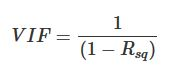

In [9]:
mod2 <- lm(HARDNESSP1 ~ ., data=my_data[1:9])
vif(mod2)


`sim#`                        thickness 
                        1.005195                         1.006163 
       TransportTimeAfterHeating EnforcedTemperatureOfEntireSheet 
                        1.006305                         1.001949 
             QuenchingTimeInTool                   QuenchingForce 
                        1.004664                         1.006106 
                         spacing           DefaultToolTemperature 
                        1.005782                         1.006543

In [10]:
apply(my_data, 2, function(x) sum(is.na(x)))
corrplot(cor(my_data))

sim# 
                                                   0 
                                           thickness 
                                                   0 
                           TransportTimeAfterHeating 
                                                   0 
                    EnforcedTemperatureOfEntireSheet 
                                                   0 
                                 QuenchingTimeInTool 
                                                   0 
                                      QuenchingForce 
                                                   0 
                                             spacing 
                                                   0 
                              DefaultToolTemperature 
                                                   0 
                                          HARDNESSP1 
                                                   0 
                                          HARDNESSP2 
                                                   0 
                                          HARDNESSP3 
                                                   0 
                                         THICKNESSP1 
                                                   0 
                                         THICKNESSP2 
                                                   0 
                                         THICKNESSP3 
                                                   0 
                                     RUECKFEDERUNGP4 
                                                   0 
                                     RUECKFEDERUNGP5 
                                                   0 
                                                X__1 
                                                 999 
                                                X__2 
                                                 999 
| AutoForm-SIGMA: Scatter Data Dump (MIME: text/csv) 
                                                 991

ERROR: Error in cor(my_data): 'x' must be numeric


# Check Assumption Automatically

In [10]:
par(mfrow=c(2,2)) 
gvlmaMod <- lm(thickness ~ spacing, data = my_data[1:8, ])
gvlma::gvlma(gvlmaMod)


Call:
lm(formula = thickness ~ spacing, data = my_data[1:8, ])

Coefficients:
(Intercept)      spacing  
    1.43695      0.04179  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma::gvlma(x = gvlmaMod) 

                      Value p-value                   Decision
Global Stat        4.455865 0.34781    Assumptions acceptable.
Skewness           0.005715 0.93974    Assumptions acceptable.
Kurtosis           0.517909 0.47173    Assumptions acceptable.
Link Function      3.861208 0.04941 Assumptions NOT satisfied!
Heteroscedasticity 0.071032 0.78984    Assumptions acceptable.

# Historical Data Fault Diagnosis System

[1] "C:/Users/zoint/Desktop/AllFiles/Projeler/R_Projects"


sim# 
                                                   0 
                                           thickness 
                                                   0 
                           TransportTimeAfterHeating 
                                                   0 
                    EnforcedTemperatureOfEntireSheet 
                                                   0 
                                 QuenchingTimeInTool 
                                                   0 
                                      QuenchingForce 
                                                   0 
                                             spacing 
                                                   0 
                              DefaultToolTemperature 
                                                   0 
                                          HARDNESSP1 
                                                   0 
                                          HARDNESSP2 
                                                   0 
                                          HARDNESSP3 
                                                   0 
                                         THICKNESSP1 
                                                   0 
                                         THICKNESSP2 
                                                   0 
                                         THICKNESSP3 
                                                   0 
                                     RUECKFEDERUNGP4 
                                                   0 
                                     RUECKFEDERUNGP5 
                                                   0 
                                                X__1 
                                                 999 
                                                X__2 
                                                 999 
| AutoForm-SIGMA: Scatter Data Dump (MIME: text/csv) 
                                                 991

# A tibble: 6 x 9
  `sim#` thickness Transpor~ EnforcedTe~ Quenchi~ Quenchi~ spac~ Default~ HARD~
   <dbl>     <dbl>     <dbl>       <dbl>    <dbl>    <dbl> <dbl>    <dbl> <dbl>
1   1.00      1.45      10.0         900     2.00   500000 0.100     80.0   464
2   2.00      1.55      25.0         950    10.0   2000000 2.00     300     441
3   3.00      1.46      21.0         934     3.94   573138 0.112    124     419
4   4.00      1.47      14.7         947     9.99  1861852 1.64     284     459
5   5.00      1.45      21.0         947     5.16   683403 0.645    161     429
6   6.00      1.47      22.6         939     5.41  1021668 1.17     283     428


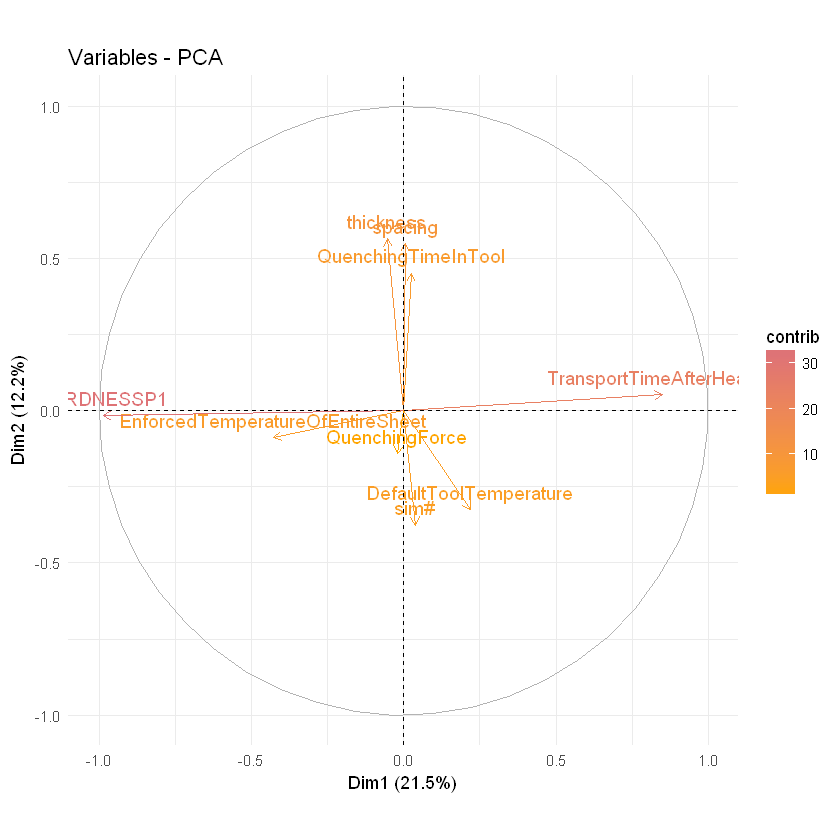

      eigenvalue variance.percent cumulative.variance.percent
Dim.1 1.93200583       21.4667314                    21.46673
Dim.2 1.10152733       12.2391925                    33.70592
Dim.3 1.05922046       11.7691162                    45.47504
Dim.4 1.05022984       11.6692205                    57.14426
Dim.5 1.02687340       11.4097044                    68.55397
Dim.6 0.95598984       10.6221093                    79.17607
Dim.7 0.92717971       10.3019968                    89.47807
Dim.8 0.89865843        9.9850936                    99.46316
Dim.9 0.04831517        0.5368353                   100.00000


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9
sim#,0.039528534,-0.37683631,0.009560826,0.28166739,0.69033083,-0.20660252,-0.16464509,-0.48026478,-0.0006585381
thickness,-0.053417974,0.56365562,0.132539913,0.17527614,0.39607583,-0.07301637,0.68422996,0.02768407,0.0024130064
TransportTimeAfterHeating,0.850910388,0.05268393,-0.375807649,-0.16434337,0.06422115,0.23367744,0.10151650,-0.13399567,-0.1339620982
EnforcedTemperatureOfEntireSheet,-0.426309564,-0.08950089,-0.592875614,-0.54639188,0.22628571,0.24133631,0.17654875,-0.11681505,0.0770747589
QuenchingTimeInTool,0.025918393,0.45150391,-0.430821361,-0.05697510,-0.15552270,-0.71535953,-0.21250985,-0.15974112,0.0038752093
QuenchingForce,-0.020807801,-0.14120066,-0.557138638,0.58050384,0.14711014,0.03351145,-0.03680137,0.55503357,0.0077604952
spacing,0.004632793,0.54855215,0.130586607,-0.16011340,0.44567550,0.27853113,-0.57924888,0.21127235,0.0028967673
DefaultToolTemperature,0.220559672,-0.32563723,0.186384593,-0.49786715,0.30484793,-0.45165776,0.08935533,0.50720952,-0.0230228882
HARDNESSP1,-0.985915183,-0.01689955,-0.032042958,-0.02966309,0.02689767,-0.02624679,-0.01993969,0.01265582,-0.1543012214


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9
sim#,0.080874755,12.89170023,0.008629875,7.55420555,46.40851155,4.4649639,2.9237056,25.66651095,8.975906e-04
thickness,0.147695206,28.84246670,1.658467633,2.92523834,15.27705950,0.5576827,50.4940550,0.08528355,1.205129e-02
TransportTimeAfterHeating,37.476516855,0.25197707,13.333521686,2.57169819,0.40164212,5.7118958,1.1114997,1.99796042,3.714329e+01
EnforcedTemperatureOfEntireSheet,9.406795864,0.72720931,33.184923001,28.42654724,4.98651750,6.0924513,3.3617496,1.51845855,1.229535e+01
QuenchingTimeInTool,0.034770242,18.50664756,17.522985297,0.30909059,2.35543264,53.5297800,4.8707319,2.83947994,3.108185e-02
QuenchingForce,0.022410107,1.80999836,29.304896820,32.08675823,2.10750346,0.1174717,0.1460710,34.28023943,1.246509e-01
spacing,0.001110906,27.31747596,1.609944549,2.44101825,19.34285709,8.1151063,36.1881588,4.96696033,1.736775e-02
DefaultToolTemperature,2.517930763,9.62659765,3.279696534,23.60166205,9.05002102,21.3385875,0.8611465,28.62728364,1.097074e+00
HARDNESSP1,50.311895301,0.02592716,0.096934605,0.08378156,0.07045511,0.0720608,0.0428818,0.01782320,4.927824e+01


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9
sim#,1.562505e-03,0.1420056010,0.0000914094,0.0793365211,0.4765566604,0.0426846009,0.0271080054,0.2306542632,4.336724e-07
thickness,2.853480e-03,0.3177076526,0.0175668284,0.0307217260,0.1568760603,0.0053313904,0.4681706318,0.0007664078,5.822600e-06
TransportTimeAfterHeating,7.240485e-01,0.0027755963,0.1412313894,0.0270087419,0.0041243561,0.0546051438,0.0103056000,0.0179548397,1.794584e-02
EnforcedTemperatureOfEntireSheet,1.817398e-01,0.0080104092,0.3515014932,0.2985440826,0.0512052218,0.0582432151,0.0311694598,0.0136457557,5.940518e-03
QuenchingTimeInTool,6.717631e-04,0.2038557802,0.1856070450,0.0032461617,0.0241873112,0.5117392580,0.0451604379,0.0255172257,1.501725e-05
QuenchingForce,4.329646e-04,0.0199376266,0.3104034621,0.3369847107,0.0216413924,0.0011230174,0.0013543410,0.3080622600,6.022529e-05
spacing,2.146277e-05,0.3009094628,0.0170528620,0.0256363021,0.1986266543,0.0775795921,0.3355292652,0.0446360075,8.391261e-06
DefaultToolTemperature,4.864657e-02,0.1060396037,0.0347392166,0.2478716984,0.0929322586,0.2039947285,0.0079843753,0.2572614965,5.300534e-04
HARDNESSP1,9.720287e-01,0.0002855947,0.0010267512,0.0008798989,0.0007234848,0.0006888939,0.0003975914,0.0001601697,2.380887e-02


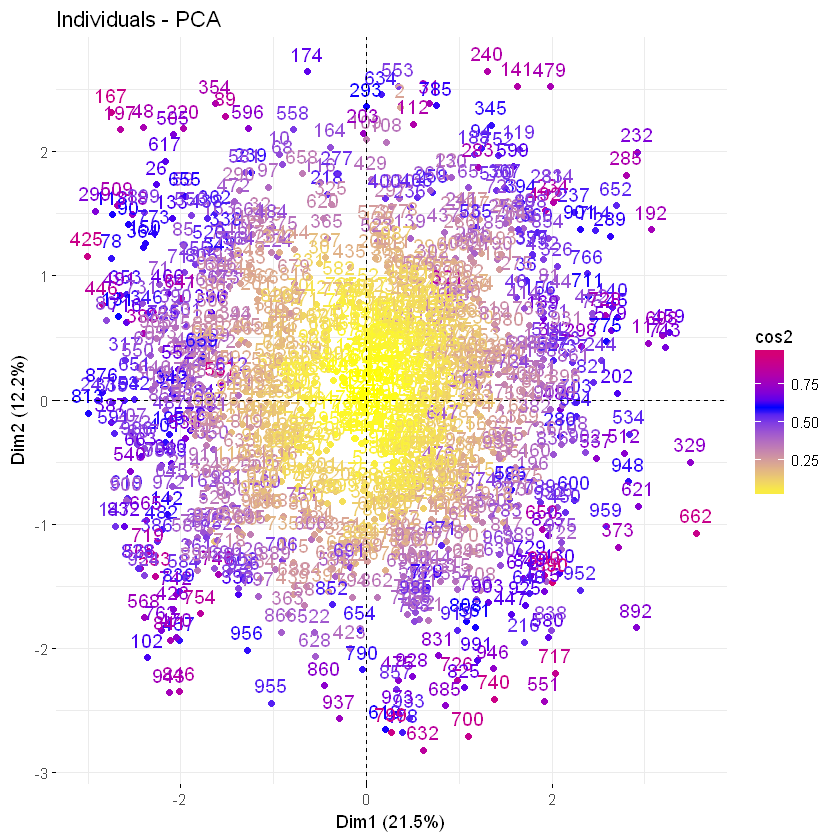

In [5]:
if(!require(readxl)) {
  install.packages("readxl"); require(readxl)
}
if(!require(MASS)) {
  install.packages("MASS"); require(MASS)
}
if(!require(factoextra)) {
  install.packages("factoextra"); require(factoextra)
}


currentDirectory <- getwd()
setwd("C:\\Users\\zoint\\Desktop\\AllFiles\\Projeler\\R_Projects")
directoryChanged <- getwd()
#print out new directory address
print(directoryChanged)

my_data <- read_excel("Autoform_1000.xlsx")
#Normalization
NaValue <- function (x) { sum(is.na(x))}
apply(my_data, 2, NaValue)
#Principal component Analysis Part
my_data.principal <- my_data[1:999, 1:9]
print(head(my_data.principal[,1:9]))
pca.graph <- prcomp(my_data.principal, scale=TRUE)
#Visualisierung
# fviz_pca_biplot(pca.graph, repel = TRUE,
#                 col.var = "#2E9FDF", # Variables color
#                 col.ind = "#696969"  # Individuals color
# )

resultPlot <- fviz_pca_var(pca.graph, col.var="contrib")+
  scale_color_gradient2(low="orange", mid="blue",
                        high="red", midpoint=96) +
  theme_minimal()
print(resultPlot)

# Gradient color
resultHeatMap <- fviz_pca_ind(pca.graph, col.ind="cos2") +
  scale_color_gradient2(low="yellow", mid="blue",
                        high="red", midpoint=0.6)

print(resultHeatMap)

eigen.values <- get_eigenvalue(pca.graph)
print(eigen.values)

result.values <- get_pca_var(pca.graph)
result.values$coord
result.values$contrib
result.values$cos2

# Graph of individuals
# An alias of fviz_pca_biplot()
#Linear Discriminant Analysis
#It is a well-established machine learning techique for predicting categories. Its main advantages,
#compared to other classification algorithms such as neural networks and random forests, are that
#the model is interpretable and that prediction is easy
my_data.lda <- lda(HARDNESSP1 ~ ., data = my_data[1:9])
my_data.lda.values <- predict(my_data.lda)